In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Upload datasets
df = pd.read_csv(".\\data\\online-valid.csv")
df2 = pd.read_csv(".\\data\\legit-urls.csv")

In [4]:
df.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,7397260,http://www.bancasella-web.x10.mx,http://www.phishtank.com/phish_detail.php?phis...,2021-12-28T11:55:19+00:00,yes,2021-12-28T12:10:53+00:00,yes,Other
1,7397256,https://sites.google.com/view/bt-web-net/home,http://www.phishtank.com/phish_detail.php?phis...,2021-12-28T11:35:22+00:00,yes,2021-12-28T11:43:46+00:00,yes,Other
2,7397245,https://mch7jm6bjg6bp.clickfunnels.com/optinsk...,http://www.phishtank.com/phish_detail.php?phis...,2021-12-28T10:49:12+00:00,yes,2021-12-28T10:52:33+00:00,yes,Other
3,7397246,https://mch7jm6bjg6bp.clickfunnels.com/optin16...,http://www.phishtank.com/phish_detail.php?phis...,2021-12-28T10:49:12+00:00,yes,2021-12-28T10:52:33+00:00,yes,Other
4,7397244,https://bbbttts-amazing-site.webflow.io/,http://www.phishtank.com/phish_detail.php?phis...,2021-12-28T10:48:18+00:00,yes,2021-12-28T10:52:33+00:00,yes,Other


In [5]:
df2.head()

,url_id,url,target,is_phishing
0,1,google.com,Other,No
1,2,youtube.com,Other,No
2,3,tmall.com,Other,No
3,4,qq.com,Other,No
4,5,baidu.com,Other,No


In [6]:
def data_info(df):
    print('SHAPE')
    print(df.shape)
    print('=====')
    print('DTYPES')
    print(df.dtypes)
    print('=====')
    print('NULL VALUES')
    print(df.isnull().sum())
    print('=====')

In [7]:
data_info(df)

SHAPE
(8053, 8)
=====
DTYPES
phish_id              int64
url                  object
phish_detail_url     object
submission_time      object
verified             object
verification_time    object
online               object
target               object
dtype: object
=====
NULL VALUES
phish_id             0
url                  0
phish_detail_url     0
submission_time      0
verified             0
verification_time    0
online               0
target               0
dtype: int64
=====


In [8]:
data_info(df2)

SHAPE
(537394, 4)
=====
DTYPES
url_id          int64
url            object
target         object
is_phishing    object
dtype: object
=====
NULL VALUES
url_id         0
url            0
target         0
is_phishing    0
dtype: int64
=====


In [9]:
df.drop(columns = ['phish_id', 'phish_detail_url','submission_time','verification_time','online'], inplace=True)

In [10]:
df['verified'] = df['verified'].eq('yes').mul(1)

In [11]:
df.rename(columns={"verified": "is_phishing"}, inplace=True)

In [12]:
df.head()

,url,is_phishing,target
0,http://www.bancasella-web.x10.mx,1,Other
1,https://sites.google.com/view/bt-web-net/home,1,Other
2,https://mch7jm6bjg6bp.clickfunnels.com/optinsk...,1,Other
3,https://mch7jm6bjg6bp.clickfunnels.com/optin16...,1,Other
4,https://bbbttts-amazing-site.webflow.io/,1,Other


In [13]:
df2.drop(columns = ['url_id'], inplace=True)

In [14]:
df2['is_phishing'] = df2['is_phishing'].eq('No').mul(0)

In [15]:
df2['url'] = 'https://' + df2['url'].astype(str)

In [16]:
df2.head()

,url,target,is_phishing
0,https://google.com,Other,0
1,https://youtube.com,Other,0
2,https://tmall.com,Other,0
3,https://qq.com,Other,0
4,https://baidu.com,Other,0


In [17]:
print("phishing urls:", len(df.index))
print("legit urls:", len(df2.index))


phishing urls: 8053
legit urls: 537394


In [18]:
drop_indices = np.random.choice(df2.index, int(len(df2.index)/1.5), replace=False)
df2 = df2.drop(drop_indices)

In [19]:
print("phishing urls:", len(df.index))
print("legit urls:", len(df2.index))

phishing urls: 8053
legit urls: 179132


In [20]:
df_combined = pd.concat([df, df2])

In [21]:
df_combined.head()

,url,is_phishing,target
0,http://www.bancasella-web.x10.mx,1,Other
1,https://sites.google.com/view/bt-web-net/home,1,Other
2,https://mch7jm6bjg6bp.clickfunnels.com/optinsk...,1,Other
3,https://mch7jm6bjg6bp.clickfunnels.com/optin16...,1,Other
4,https://bbbttts-amazing-site.webflow.io/,1,Other


In [22]:
df_combined[df_combined.duplicated()]

,url,is_phishing,target
5120,https://huynguyen2k.github.io/netflix/,1,Other
5402,https://onedrive.live.com/view.aspx?resid=B730...,1,Other
5435,https://bruno-genthial.mykajabi.com/admin_inde...,1,Other
5952,https://clone-7473c.web.app/login,1,Amazon.com
537072,https://https://login.microsoftonline.com,0,Microsoft
537253,https://internetexplorer.co,0,Microsoft
537261,https://live.com,0,Microsoft
537263,https://live.eu,0,Microsoft


In [23]:
df_combined.drop_duplicates(inplace=True)
msft_domains = df_combined

In [24]:
# domains =['microsoft', 'live', 'office', 'skype','onenote', 'msn', 'bing', 'hotmail', 'msdn', 'outlook', 'windows', 'askapolitician', 'explorer', 'visualstudio', 'visual' ,'studio']

# pattern = '|'.join(domains)

In [25]:
# msft_domains = df_combined.loc[(df_combined['url'].str.contains(pattern, case=False)) | (df_combined['target'] == 'Microsoft')]

In [26]:
msft_domains.head()

,url,is_phishing,target
0,http://www.bancasella-web.x10.mx,1,Other
1,https://sites.google.com/view/bt-web-net/home,1,Other
2,https://mch7jm6bjg6bp.clickfunnels.com/optinsk...,1,Other
3,https://mch7jm6bjg6bp.clickfunnels.com/optin16...,1,Other
4,https://bbbttts-amazing-site.webflow.io/,1,Other


In [27]:
data_info(msft_domains)

SHAPE
(187177, 3)
=====
DTYPES
url            object
is_phishing     int32
target         object
dtype: object
=====
NULL VALUES
url            0
is_phishing    0
target         0
dtype: int64
=====


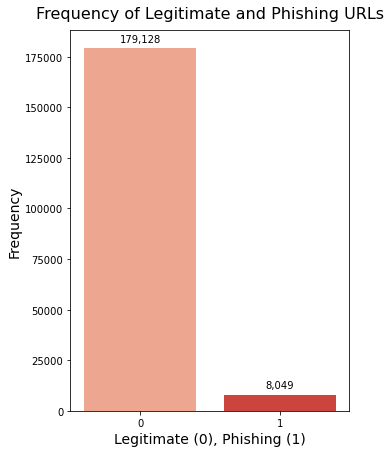

In [28]:
plt.figure(figsize = (5, 7))        
bar = sns.countplot(x=msft_domains["is_phishing"], 
              data=msft_domains, 
              palette="Reds")
for p in bar.patches:
    bar.annotate(format(p.get_height(), ','), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Frequency of Legitimate and Phishing URLs', fontsize = 16, pad = 12)
plt.xlabel('Legitimate (0), Phishing (1)', fontsize = 14)
plt.ylabel("Frequency",fontsize = 14)
plt.show();

In [29]:
msft_domains.to_csv("..\\data\\combined_urls.csv", index=False)